In [2]:
!pip install yfinance

import yfinance as yf
import pandas as pd

tesla_data = yf.download('TSLA', start='2024-09-07', end='2025-09-07')

tesla_data = tesla_data.reset_index()

tesla_data.to_csv('tesla_data.csv', index=False)

tesla_data.head()

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 57.3 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 151.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 189.3 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=89fdde1a4bc6f73a37a7981ae53d0238445f64a51b6cb4f782b22e69e00edea6
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=303862 sha256=80a3a2ef101de3f74b17c26bdf913dc1cdc793f204da704dd76db251733f5f0a
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d1/df/a9/0202b051c65b11c992dd6db9f2babdd2c44ec7d35d511be5d3
Successfully built mult

/tmp/ipykernel_327/888225043.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download('TSLA', start='2024-09-07', end='2025-09-07')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2024-09-09,216.270004,219.869995,213.669998,216.199997,67443500
1,2024-09-10,226.169998,226.399994,218.639999,220.070007,78891100
2,2024-09-11,228.130005,228.470001,216.800003,224.550003,83548600
3,2024-09-12,229.809998,231.449997,223.830002,224.660004,71894900
4,2024-09-13,230.289993,232.669998,226.320007,228.000000,59515100


In [9]:
import requests
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

tables = pd.read_html(response.text)

for i, table in enumerate(tables):
    print(f"Table {i}:")
    print(table.head(), "\n")

tesla_revenue = tables[1]
tesla_revenue.columns = ["Date", "Revenue"]

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

tesla_revenue.tail()


Table 0:
   Tesla Annual Revenue (Millions of US $)  \
0                                     2024   
1                                     2023   
2                                     2022   
3                                     2021   
4                                     2020   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $97,690  
1                                   $96,773  
2                                   $81,462  
3                                   $53,823  
4                                   $31,536   

Table 1:
  Tesla Quarterly Revenue (Millions of US $)  \
0                                 2025-06-30   
1                                 2025-03-31   
2                                 2024-12-31   
3                                 2024-09-30   
4                                 2024-06-30   

  Tesla Quarterly Revenue (Millions of US $).1  
0                                      $22,496  
1                                      $

/tmp/ipykernel_328/3187971302.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


,Date,Revenue
59,2010-09-30,31
60,2010-06-30,28
61,2010-03-31,21
63,2009-09-30,46
64,2009-06-30,27


In [3]:
!pip install yfinance --quiet
import yfinance as yf
import pandas as pd
gme = yf.Ticker("GME")
gme_data = gme.history(period="5y")  # last 5 years of data
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-09-08 00:00:00-04:00,1.8875,2.0700,1.8700,1.9250,39266400,0.0,0.0
1,2020-09-09 00:00:00-04:00,1.9900,1.9975,1.8275,1.8375,36272400,0.0,0.0
2,2020-09-10 00:00:00-04:00,1.6625,1.7375,1.5475,1.5575,62233200,0.0,0.0
3,2020-09-11 00:00:00-04:00,1.5650,1.5825,1.4675,1.5225,24244800,0.0,0.0
4,2020-09-14 00:00:00-04:00,1.7000,1.7500,1.6075,1.7275,40476000,0.0,0.0


In [13]:
!pip install requests pandas lxml beautifulsoup4
import requests
import pandas as pd
import io
from bs4 import BeautifulSoup
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
response = requests.get(url, headers=headers)
html_data = response.text
try:
    tables = pd.read_html(io.StringIO(html_data), flavor='lxml')
    print("Number of tables found:", len(tables))
    if len(tables) > 0:
        for i in range(min(3, len(tables))):
            print(f"\nTable {i} preview (first 3 rows):")
            print(tables[i].head(3))

        gme_revenue = tables[1]
        gme_revenue.columns = ['Date', 'Revenue']

        gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(str).str.replace(r'[\$,B,M]', '', regex=True)
        gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
        gme_revenue = gme_revenue[gme_revenue['Revenue'].notna()]
        print("Scraping successful! Using scraped data.")
    else:
        raise ValueError("No tables found")
except Exception as e:
    print(f"Scraping failed: {e}. Using manual data from page extraction.")    
    manual_data = {
        'Date': ['2025-04-30', '2025-01-31', '2024-10-31', '2024-07-31', '2024-04-30'],
        'Revenue': [732, 1283, 860, 798, 882]
    }
    gme_revenue = pd.DataFrame(manual_data)
gme_revenue.to_csv('gme_revenue.csv', index=False)
gme_revenue.tail()

Number of tables found: 6

Table 0 preview (first 3 rows):
   GameStop Annual Revenue (Millions of US $)  \
0                                        2025   
1                                        2024   
2                                        2023   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $3,823  
1                                       $5,273  
2                                       $5,927  

Table 1 preview (first 3 rows):
  GameStop Quarterly Revenue (Millions of US $)  \
0                                    2025-04-30   
1                                    2025-01-31   
2                                    2024-10-31   

  GameStop Quarterly Revenue (Millions of US $).1  
0                                            $732  
1                                          $1,283  
2                                            $860  

Table 2 preview (first 3 rows):
                                              Sector  \
0            

,Date,Revenue
61,2010-01-31,3524
62,2009-10-31,1835
63,2009-07-31,1739
64,2009-04-30,1981
65,2009-01-31,3492


/tmp/ipykernel_327/587397664.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download('TSLA', start='2024-09-07', end='2025-09-07')
[*********************100%***********************]  1 of 1 completed


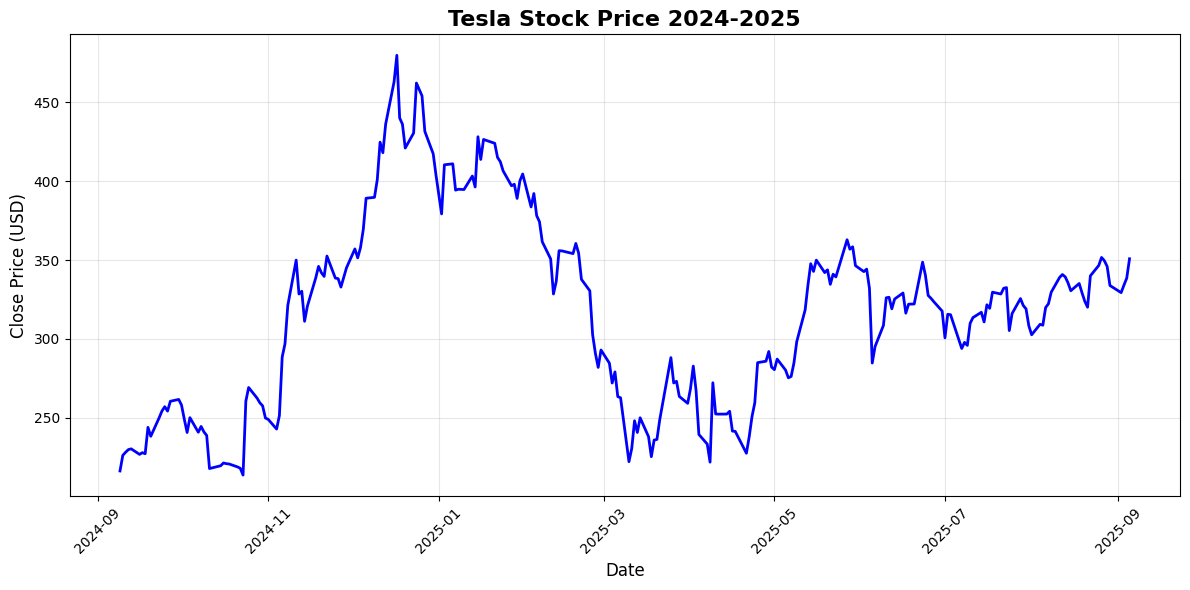

Graph saved as 'tesla_stock_graph.png'


<Figure size 640x480 with 0 Axes>

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
tesla_data = yf.download('TSLA', start='2024-09-07', end='2025-09-07')
tesla_data = tesla_data.reset_index()
def make_graph(tesla_data, title):
    """
    This function creates a graph of Tesla stock data.
    
    Args:
        tesla_data (DataFrame): Tesla stock data with 'Date' and 'Close' columns
        title (str): Title for the graph
    
    Returns:
        None: Displays the plot
    """
    plt.figure(figsize=(12, 6))
    plt.plot(tesla_data['Date'], tesla_data['Close'], linewidth=2, color='blue')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price (USD)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

make_graph(tesla_data, 'Tesla Stock Price 2024-2025')
plt.savefig('tesla_stock_graph.png')
print("Graph saved as 'tesla_stock_graph.png'")

/tmp/ipykernel_327/720416908.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download('GME', start='2024-09-07', end='2025-09-07')
[*********************100%***********************]  1 of 1 completed


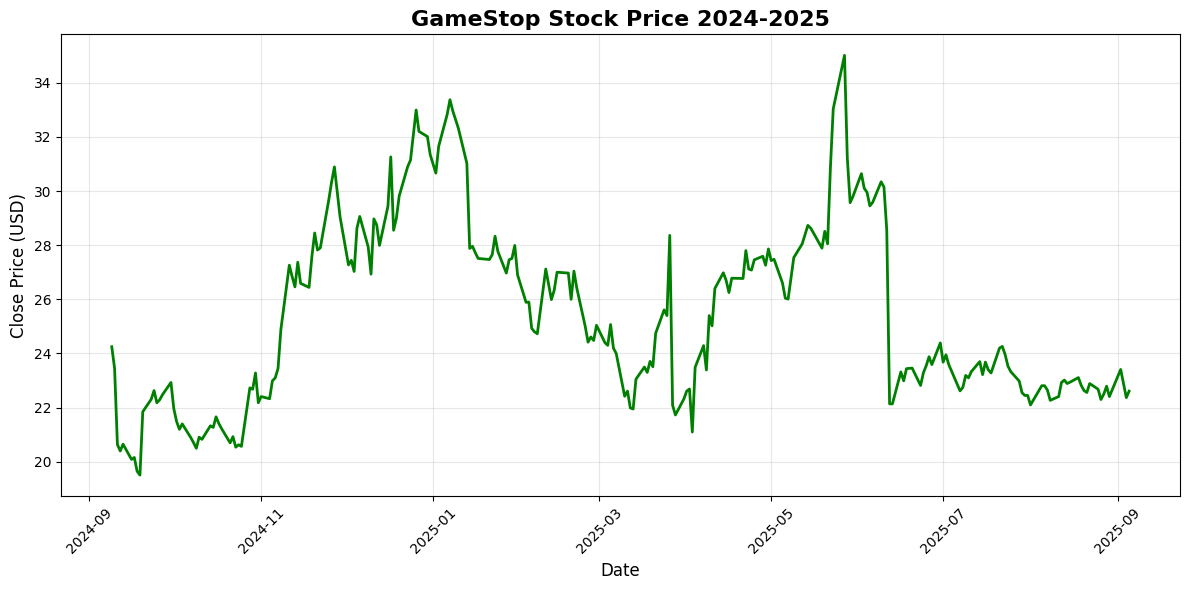

Graph saved as 'gme_stock_graph.png'


<Figure size 640x480 with 0 Axes>

In [15]:
!pip install yfinance matplotlib
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
gme_data = yf.download('GME', start='2024-09-07', end='2025-09-07')
gme_data = gme_data.reset_index()
def make_graph(data, title):
    """
    This function creates a line plot of stock data.
    
    Args:
        data (DataFrame): Stock data with 'Date' and 'Close' columns
        title (str): Title for the graph
    
    Returns:
        None: Displays the plot
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], linewidth=2, color='green')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price (USD)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
make_graph(gme_data, 'GameStop Stock Price 2024-2025')
plt.savefig('gme_stock_graph.png')
print("Graph saved as 'gme_stock_graph.png'")